In [1]:
#run only once!
%load_ext autoreload
%autoreload 2
import os
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [2]:
import numpy as np
from phidl import LayerSet
from phidl import quickplot as qp
from phidl import Path, CrossSection, Device
import phidl.path as pp
import phidl.geometry as pg
import phidl
import matplotlib.pyplot as plt
from deprecated.Bertram_Functions.MyPhidlFunctions import *
from Schuster_Resonators.resonator import ChipResonatorsTline, ChipTline, ChipResonatorsTwoTlines, ChipResonatorsThreeTlines
from Schuster_Resonators.approx_Schuster import *
from CPW.cpw import *

Permeability and thickness heterostructure

In [3]:
epsilon_r = [11.9]
thickness_subs = [525e-6]

In [4]:
Lk = 100e-15

Feedline

In [5]:
FeedlineWidth = 20
FeedlineLength  = 4400
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth*1e-6, FeedlineGap*1e-6, epsilon_r, thickness_subs, ind_kin_sq=Lk), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth*1e-6, FeedlineGap*1e-6, epsilon_r, thickness_subs, ind_kin_sq=Lk, length_CPW=(FeedlineLength + FeedlineTaperLength + BondpadLength)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.361087063625966 Ohm
Frequency of the feedline is 2.944881013788106 GHz


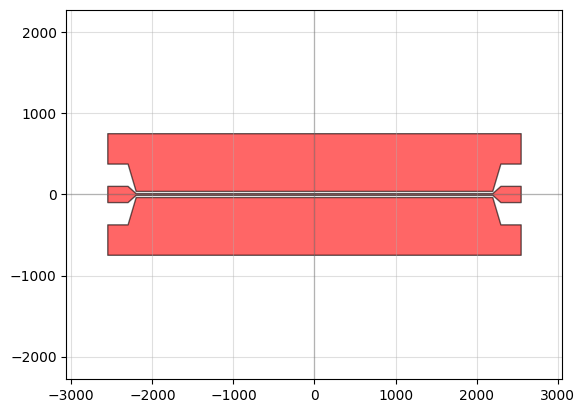

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20241125-SiRes-Al\\Tline.gds'

In [6]:
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 1500]

_, _, TLine = ChipTline(ChipSize,
                          FeedlineWidth, 
                          FeedlineLength, 
                          FeedlineGap, 
                          FeedlineTaperLength, 
                          BondpadWidth, 
                          BondpadLength, 
                          BondpadGap)
qp(TLine)
TLine.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241125-SiRes-Al\Tline.gds")

Resonator 1
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 151.572141403405 fF
 Cc: 0.897486035281895 fF
Resonator 2
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 208.4116944296819 fF
 Cc: 0.897486035281895 fF
Inductor total length is [5995. 5995.]
The frequencies are [np.float64(4.619227805946126), np.float64(3.9424565146103503)]


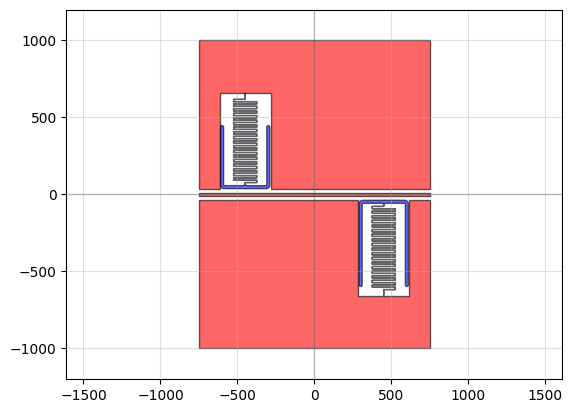

In [7]:
NumberOfResonators = int(2)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[400,550]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[35] 
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*[0] 
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
FeedlineLength = 1500 
ChipSize = [FeedlineLength, 2000] 

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)

# chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241125-SiRes-Al\Second-Third.gds")
qp(chip)

Resonator 1
 Geometric: 8.653640754532878 nH/m
 Kinetic: 1.274166666666667 nH/m
 Ltot: 9.927807421199544 nH
 Cg: 227.35821210510753 fF
 Cc: 0.897486035281895 fF
Inductor total length is [7645.]
The frequencies are [np.float64(3.3433561762822315)]


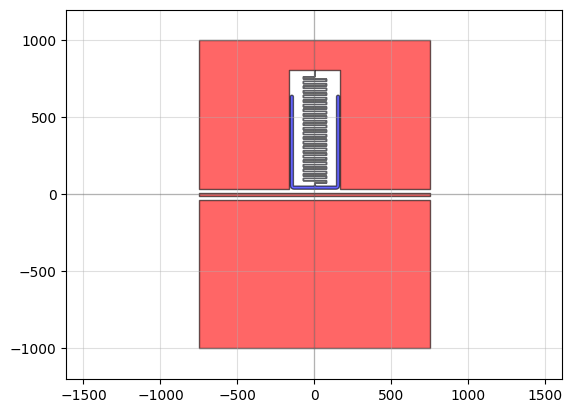

In [ ]:
NumberOfResonators = int(1)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[600]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[45] 
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*[0] 
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
FeedlineLength = 1500 
ChipSize = [FeedlineLength, 2000] 

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)

#chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241125-SiRes-Al\First.gds")
qp(chip)

Resonator 1
 Geometric: 2.3576359958126085 nH/m
 Kinetic: 0.3466666666666667 nH/m
 Ltot: 2.704302662479275 nH
 Cg: 151.572141403405 fF
 Cc: 0.897486035281895 fF
Inductor total length is [2080.]
The frequencies are [np.float64(7.837919780081178)]


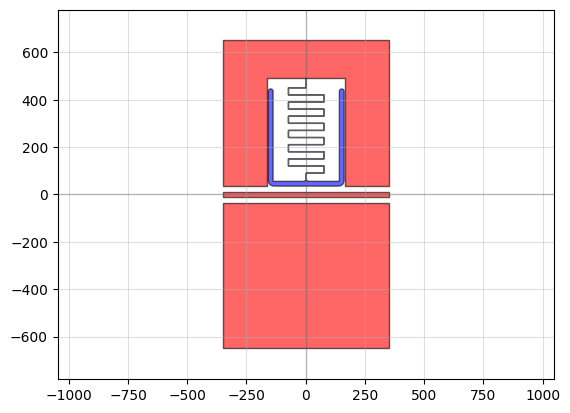

In [ ]:
NumberOfResonators = int(1)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*400 
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[10] 
InductorVerticalLength = np.ones(NumberOfResonators)*[30] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*[0] 
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
FeedlineLength = 700 
ChipSize = [FeedlineLength, 1300] 

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)

#chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241125-SiRes-Al\Last.gds")
qp(chip)

Resonator 1
 Geometric: 3.0534208882857383 nH/m
 Kinetic: 0.4491666666666667 nH/m
 Ltot: 3.502587554952405 nH
 Cg: 75.7860707017025 fF
 Cc: 0.897486035281895 fF
Resonator 2
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 208.4116944296819 fF
 Cc: 0.897486035281895 fF
Inductor total length is [2695. 5995.]
The frequencies are [np.float64(9.711235979696266), np.float64(3.9424565146103503)]


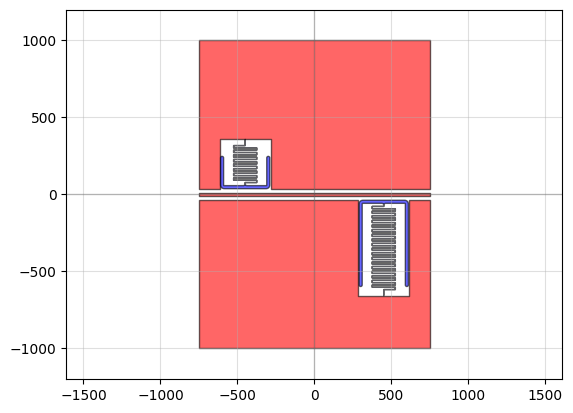

In [91]:
NumberOfResonators = int(2)
SeparationTlineResonator = [0]*NumberOfResonators

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[200,550]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[15,35] 
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*[0] 
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
FeedlineLength = 1500 
ChipSize = [FeedlineLength, 2000] 

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)

chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\2024122-SiRes-Al\low_high.gds")
qp(chip)

Resonator 1
 Geometric: 3.0534208882857383 nH/m
 Kinetic: 0.4491666666666667 nH/m
 Ltot: 3.502587554952405 nH
 Cg: 75.7860707017025 fF
 Cc: 0.897486035281895 fF
Resonator 2
 Geometric: 3.426768879368881 nH/m
 Kinetic: 0.5041666666666668 nH/m
 Ltot: 3.9309355460355473 nH
 Cg: 92.62741974652529 fF
 Cc: 0.897486035281895 fF
Resonator 3
 Geometric: 3.9867908659935942 nH/m
 Kinetic: 0.5866666666666667 nH/m
 Ltot: 4.57345753266026 nH
 Cg: 109.46876879134805 fF
 Cc: 0.897486035281895 fF
Resonator 4
 Geometric: 4.5468128526183085 nH/m
 Kinetic: 0.6691666666666667 nH/m
 Ltot: 5.215979519284975 nH
 Cg: 126.31011783617085 fF
 Cc: 0.897486035281895 fF
Resonator 5
 Geometric: 5.106834839243024 nH/m
 Kinetic: 0.7516666666666668 nH/m
 Ltot: 5.85850150590969 nH
 Cg: 143.15146688099364 fF
 Cc: 0.897486035281895 fF
Resonator 6
 Geometric: 5.480182830326165 nH/m
 Kinetic: 0.8066666666666668 nH/m
 Ltot: 6.286849496992832 nH
 Cg: 159.99281592581642 fF
 Cc: 0.897486035281895 fF
Resonator 7
 Geometric: 6.040

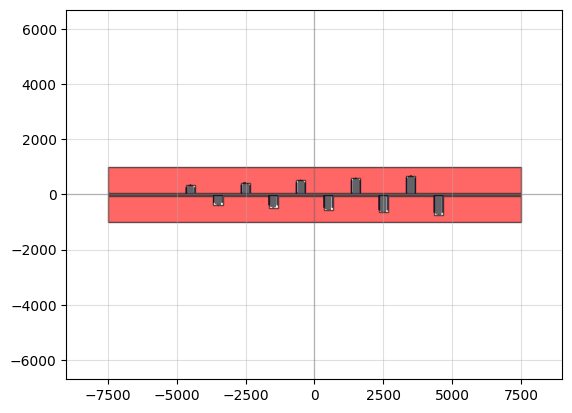

In [ ]:
NumberOfResonators = int(10)
SeparationTlineResonator = [0]*NumberOfResonators

cvl = np.linspace(200, 600, NumberOfResonators)
nob = np.linspace(15, 40, NumberOfResonators, dtype=int)

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*cvl
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*nob
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*[0] 
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
FeedlineLength = 1500*10
ChipSize = [FeedlineLength, 2000] 

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)

#chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\2024122-SiRes-Al\ten_resonators_4-10GHz.gds")
qp(chip)

Resonator 1
 Geometric: 6.600226803575594 nH/m
 Kinetic: 0.9716666666666668 nH/m
 Ltot: 7.5718934702422604 nH
 Cg: 193.67551401546194 fF
 Cc: 0.897486035281895 fF
Resonator 2
 Geometric: 7.160248790200308 nH/m
 Kinetic: 1.0541666666666667 nH/m
 Ltot: 8.214415456866975 nH
 Cg: 210.51686306028475 fF
 Cc: 0.897486035281895 fF
Inductor total length is [5830. 6325.]
The frequencies are [np.float64(4.1464515624140885), np.float64(3.819131123104804)]


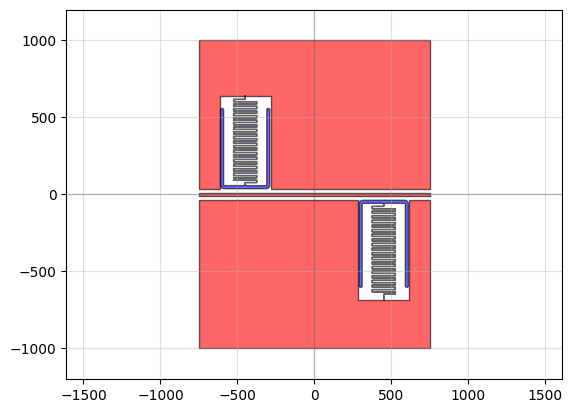

In [ ]:
NumberOfResonators = int(2)
SeparationTlineResonator = [0]*NumberOfResonators

cvl = np.linspace(200, 600, 10)
nob = np.linspace(15, 40, 10, dtype=int)

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[cvl[7],cvl[8]]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[nob[7],nob[8]]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*[0] 
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
FeedlineLength = 1500
ChipSize = [FeedlineLength, 2000] 

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)

#chip.write_gds(r"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/2024122-SiRes-Al/si_resonators_8_9.gds")
qp(chip)

Resonator 1
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 208.4116944296819 fF
 Cc: 0.897486035281895 fF
Inductor total length is [5995.]
The frequencies are [np.float64(3.9424565146103503)]


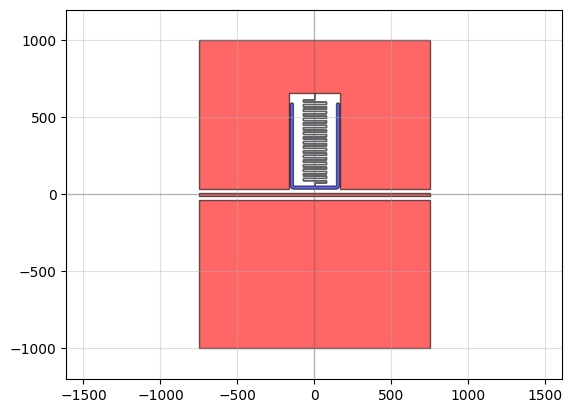

In [ ]:
#these are the determined parameters, in cell down we change the vertical cap length and inductor total length


NumberOfResonators = int(1)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[550]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[35]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*[0] 
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
FeedlineLength = 1500
ChipSize = [FeedlineLength, 2000] 

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)


il = np.round(InductorTotalLength)
cvl = np.round(CapacitorVerticalLength)

#chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/2024122-SiRes-Al/si_resonator_capwidth_{cvl}_indlen_{il}.gds")
qp(chip)

Resonator 1
 Geometric: 5.666856825867737 nH/m
 Kinetic: 0.8341666666666667 nH/m
 Ltot: 6.5010234925344035 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Inductor total length is [5005.]
The frequencies are [np.float64(6.383105419984824)]


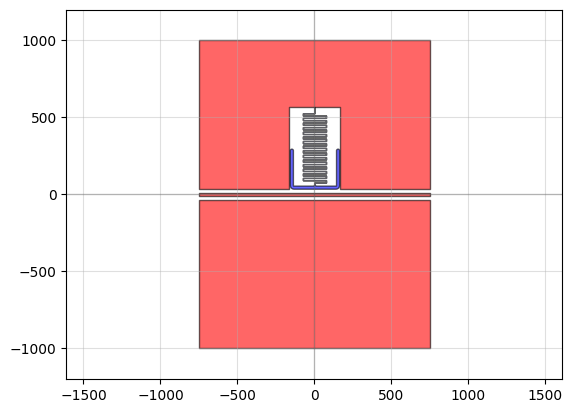

In [ ]:
#ten resonators on one feedline with changing vertical capacitor length

NumberOfResonators = int(1)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[35]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*[0] 
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
FeedlineLength = 1500
ChipSize = [FeedlineLength, 2000] 

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)


il = round(InductorTotalLength[0])
cvl = round(CapacitorVerticalLength[0])

#chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/2024122-SiRes-Al/si_resonator_nob{NumberOfBends}_capwidth_{cvl}_indlen_{il}.gds")
qp(chip)

Resonator 1
 Geometric: 3.0534208882857383 nH/m
 Kinetic: 0.4491666666666667 nH/m
 Ltot: 3.502587554952405 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Resonator 2
 Geometric: 3.6134428749104517 nH/m
 Kinetic: 0.5316666666666666 nH/m
 Ltot: 4.145109541577119 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Resonator 3
 Geometric: 4.173464861535166 nH/m
 Kinetic: 0.6141666666666667 nH/m
 Ltot: 4.787631528201833 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Resonator 4
 Geometric: 4.5468128526183085 nH/m
 Kinetic: 0.6691666666666667 nH/m
 Ltot: 5.215979519284975 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Resonator 5
 Geometric: 4.73348684815988 nH/m
 Kinetic: 0.6966666666666667 nH/m
 Ltot: 5.430153514826547 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Resonator 6
 Geometric: 5.293508834784594 nH/m
 Kinetic: 0.7791666666666667 nH/m
 Ltot: 6.07267550145126 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Resonator 7
 Geometric: 5.6668568

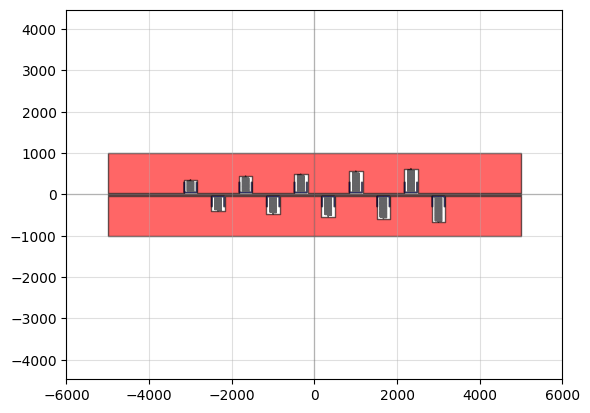

In [14]:
#ten resonators on one feedline with changing inductor length by changing the number of bends

NumberOfResonators = int(10)
SeparationTlineResonator = [0]*NumberOfResonators

cvl = np.linspace(200, 600, NumberOfResonators)
nob = np.linspace(15, 40, NumberOfResonators, dtype=int)

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[15,18,21,23,24,27,29,30,33,36]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*[0] 
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
FeedlineLength = 10000
ChipSize = [FeedlineLength, 2000] 

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)

chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\2024122-SiRes-Al\ten_resonators_variable_indlength.gds")
qp(chip)

Resonator 1
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 37.89303535085125 fF
 Cc: 0.897486035281895 fF
Resonator 2
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 56.83955302627688 fF
 Cc: 0.897486035281895 fF
Resonator 3
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 75.7860707017025 fF
 Cc: 0.897486035281895 fF
Resonator 4
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Resonator 5
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 113.67910605255376 fF
 Cc: 0.897486035281895 fF
Resonator 6
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 132.6256237279794 fF
 Cc: 0.897486035281895 fF
Resonator 7
 Geometric: 6.78690079911716

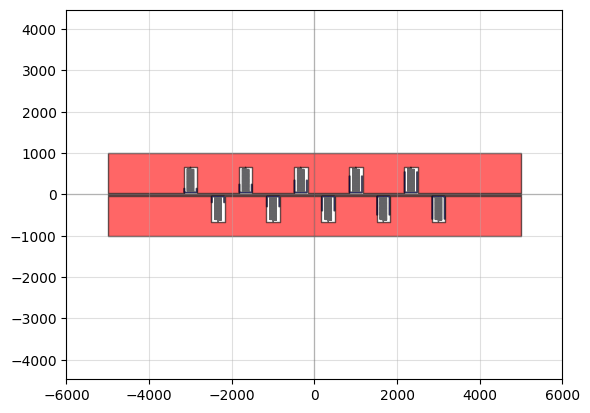

In [ ]:
NumberOfResonators = int(10)
SeparationTlineResonator = [0]*NumberOfResonators

cvl = np.linspace(200, 600, NumberOfResonators)
nob = np.linspace(15, 40, NumberOfResonators, dtype=int)

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[100,150,200,250,300,350,400,450,500,550]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[35]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*[0] 
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
FeedlineLength = 10000
ChipSize = [FeedlineLength, 2000] 

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)

#chip.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\2024122-SiRes-Al\ten_resonators_variable_verticalcaplength.gds")
qp(chip)